# Eugene Dave G. Tumagan BSCS 3B

In [1]:
q="Use the attached datasets. What will you do is run logistic regression. The dependent variable is a willingness to pay. 1-willing to pay(YES) and 0 not willing to pay(No). Kindly change the Excel file. Other variables are independent. Note the independent variables are also categorical. 
The objective is to know what are the variables that affect the willingness to pay. Also, interpret the results and coefficients. "
q

[1] "Use the attached datasets. What will you do is run logistic regression. The dependent variable is a willingness to pay. 1-willing to pay(YES) and 0 not willing to pay(No). Kindly change the Excel file. Other variables are independent. Note the independent variables are also categorical. \nThe objective is to know what are the variables that affect the willingness to pay. Also, interpret the results and coefficients. "

In [2]:
install.packages('ResourceSelection')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# # library imports

In [3]:
library(readxl)
library(dplyr)
library(ggplot2)
library(ResourceSelection)
library(repr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ResourceSelection 0.3-5 	 2019-07-22



In [4]:
df = read_excel('/kaggle/input/sheetss/template-survey-tally-sheet.xlsx')
df

New names:
• `` -> `...9`
• `` -> `...10`


Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Comments,...9,...10
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>
NA,1-Male,1-Single,1-Urban,1-Allowance,NA,1-Yes,NA,NA,NA
NA,2-Female,2-Married,2-Rural,2-Business,NA,2-No,NA,NA,NA
NA,NA,3-Widowed,NA,3-Freelance,NA,NA,NA,NA,NA
1,1,1,1,3,29,2,no stable income,NA,EMP-IPM
2,2,1,2,1,30,2,no stable income,NA,SP-IPM
3,2,1,2,3,22,2,preferred lower premium,NA,NA
4,2,1,2,1,24,1,NEW,NA,NA
5,1,1,2,1,31,1,NEW,NA,NA
6,2,1,2,1,21,1,NEW,NA,NA


### The first three rows contains the representation of the integers from excel format.
### remove first 3 rows
### last two columns also appears to be irrelevant with its missing values.

In [5]:
df = df[4:dim(df)[1],]
head(df)

Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Comments,...9,...10
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>
1,1,1,1,3,29,2,no stable income,NA,EMP-IPM
2,2,1,2,1,30,2,no stable income,NA,SP-IPM
3,2,1,2,3,22,2,preferred lower premium,NA,NA
4,2,1,2,1,24,1,NEW,NA,NA
5,1,1,2,1,31,1,NEW,NA,NA
6,2,1,2,1,21,1,NEW,NA,NA


In [6]:
is.na(df) %>% apply(., 2, sum) %>% as.data.frame()

,.
,<int>
Respondent,0
Sex,0
Civil Status,0
Location,0
Source of Income,0
Age,0
Willing To Pay,0
Comments,0
...9,100


### other than last 2 columns, the rest have no missing values.
### isolating other columns

In [7]:
cols = c('...9','...10','Comments')
iso = df %>% select(., cols)
df = df %>% select(., -cols)
head(df)
head(iso)

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(cols)

  # Now:
  data %>% select(all_of(cols))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1,1,1,3,29,2
2,2,1,2,1,30,2
3,2,1,2,3,22,2
4,2,1,2,1,24,1
5,1,1,2,1,31,1
6,2,1,2,1,21,1


...9,...10,Comments
<lgl>,<chr>,<chr>
NA,EMP-IPM,no stable income
NA,SP-IPM,no stable income
NA,NA,preferred lower premium
NA,NA,NEW
NA,NA,NEW
NA,NA,NEW


In [8]:
df = df %>% apply(., 2, as.numeric) %>% as.data.frame()
head(df)

,Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,3,29,2
2,2,2,1,2,1,30,2
3,3,2,1,2,3,22,2
4,4,2,1,2,1,24,1
5,5,1,1,2,1,31,1
6,6,2,1,2,1,21,1


In [9]:
summary(df)

   Respondent          Sex       Civil Status     Location    Source of Income
 Min.   :  1.00   Min.   :1.0   Min.   :1.00   Min.   :1.00   Min.   :1.00    
 1st Qu.: 25.75   1st Qu.:1.0   1st Qu.:1.00   1st Qu.:2.00   1st Qu.:1.00    
 Median : 50.50   Median :2.0   Median :1.00   Median :2.00   Median :1.50    
 Mean   : 50.50   Mean   :1.6   Mean   :1.26   Mean   :1.77   Mean   :1.89    
 3rd Qu.: 75.25   3rd Qu.:2.0   3rd Qu.:2.00   3rd Qu.:2.00   3rd Qu.:3.00    
 Max.   :100.00   Max.   :2.0   Max.   :2.00   Max.   :2.00   Max.   :3.00    
      Age        Willing To Pay
 Min.   :21.00   Min.   :1.00  
 1st Qu.:22.00   1st Qu.:1.00  
 Median :27.00   Median :1.00  
 Mean   :30.68   Mean   :1.26  
 3rd Qu.:34.25   3rd Qu.:2.00  
 Max.   :56.00   Max.   :2.00  

In [10]:
for (x in colnames(df)){
    print(x)
    print(table(df[[x]]))
    }

[1] "Respondent"

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
[1] "Sex"

 1  2 
40 60 
[1] "Civil Status"

 1  2 
74 26 
[1] "Location"

 1  2 
23 77 
[1] "Source of Income"

 1  2  3 
50 11 39 
[1] "Age"

21 22 23 24 25 26 27 28 29 3

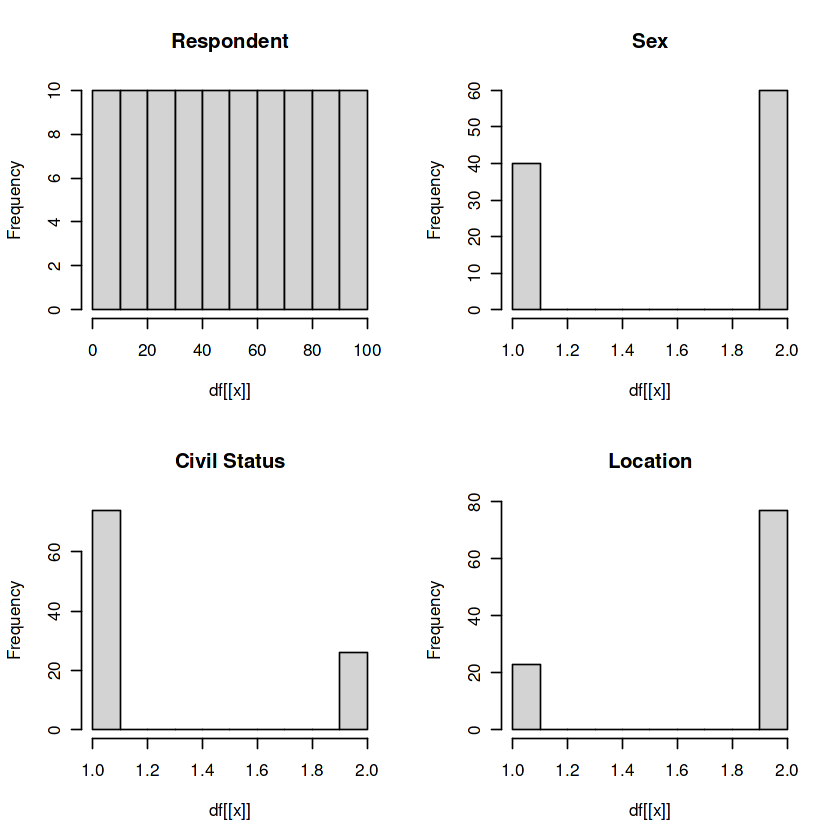

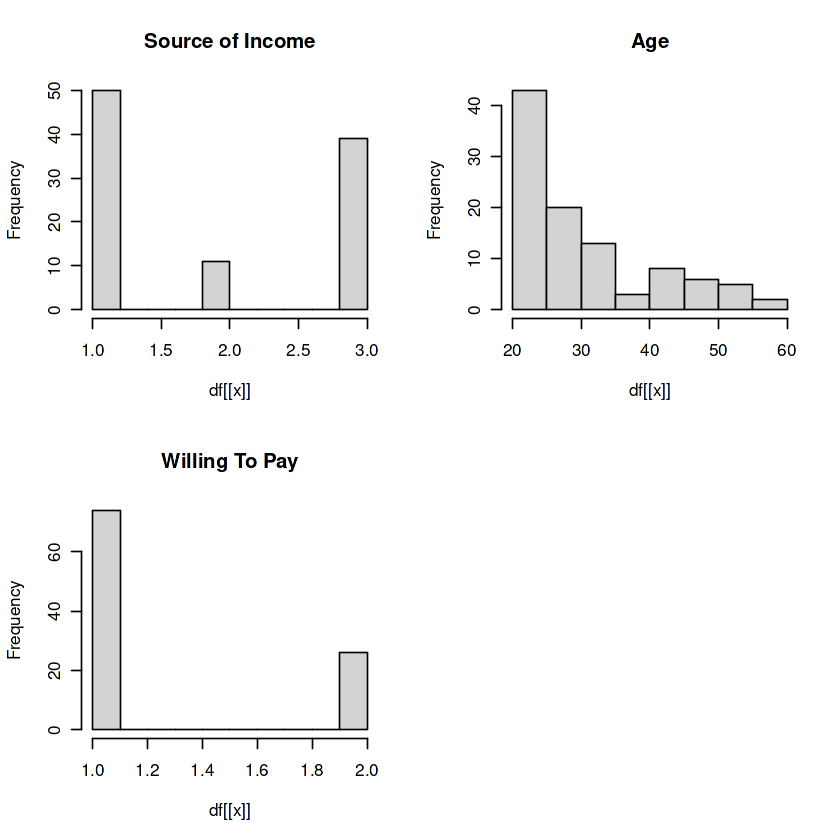

In [11]:
par(mfrow=c(2,2))
for (x in colnames(df)){
    a = hist(df[[x]], main=x)
}

options(repr.a.width=10,repr.a.height=3)

In [12]:
plot = heatmap(corss %>% as.matrix)
options(repr.plot.width=5,repr.plot.height=5)

ERROR: Error in as.matrix(.): object 'corss' not found


In [ ]:
corss = cor(df,method='spearman') %>% apply(., 2, abs) %>% as.matrix()
corss = corss %>% as.data.frame()
corss

In [ ]:
plot = barplot(corss$Age,col='steelblue', names.arg=colnames(corss))
options(repr.plot.width = 14, repr.plot.height = 5)
text(x = plot, y = corss$Age, labels = corss$Age, pos = 3, corss$Age)

### Likely no error or outlier data.
### Age is mostly at 20s, highest being around 20-25.
### Civil Status: no widow. Mostly single, likely because of Age distribution is mostly at 20s.
### Willingness to pay is mostly "YES" and has a large difference in sample size compared to "NO". Having imbalanced cases of 74 vs 26 sample cases. 
### Samples mostly come from rural area.
### Source of Income is mostly allowance. Also likely because of Age distribution. Least is business.

In [14]:
func = function(x){
    if (x <= 35){
        return(1) 
    }else{
        return(2)
    }
}
df = df$Age %>% sapply(., func) %>% cbind(df, .) %>% as.data.frame() %>% rename(., 'Age.cat'='.')
head(df)

,Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Age.cat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,3,29,2,1
2,2,2,1,2,1,30,2,1
3,3,2,1,2,3,22,2,1
4,4,2,1,2,1,24,1,1
5,5,1,1,2,1,31,1,1
6,6,2,1,2,1,21,1,1


In [ ]:
for (x in colnames(df)){
    if (x!='Respondent'){
        if (x=='Age'){
        div = seq(20,60,5)
        age_range= cut(df$Age, div )
        dft = cbind(df, age_range)
        tab = table(dft$age_range, dft$'Willing To Pay')
        }
        else{
            tab = table(df[[x]], df$'Willing To Pay')
        }
        print('--------------------')
        print(x)
        prop = tab[,1]/(tab[,1]+tab[,2])
        tab = cbind(tab,prop)
        print(tab)
        }
}

### Age and Civil Status has moderate correlation (0.5). Followed by Source of Income at 0.22 (weak correlation)

### The probability of having Willing and non-willing falls heavily to Willing in all variables.
### The probability of Willing cases in Age drops on age range of 35-40 and peaks in 25-35 and 50-55. 
### Categorizing it into younger and older adults likely to give no significant contribution in predicting non-willing cases with both young and older adults fall heavily on willing cases.
### Civil status appears to have the best balance for accuracy having 0.8 and 0.57 probability. Likely going to become the best categorical determinant for willing and non-willing cases.

# Chi-Square Testing:
#### Checking for Association Between target and independent variables.

In [15]:

for (x in colnames(df)) {
  if (x != "Willing To Pay") {
    # Create the contingency table
    contingency_table <- table(df[[x]], df$'Willing To Pay')
    
    # Perform Fisher's exact test
    result <- chisq.test(contingency_table)
    
    # Print the results
    print("-----------------")
    print(x)
    print("-----------------")
    print(result)
  }
}


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
[1] "Respondent"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 100, df = 99, p-value = 0.453

[1] "-----------------"
[1] "Sex"
[1] "-----------------"

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 1.8213, df = 1, p-value = 0.1772

[1] "-----------------"
[1] "Civil Status"
[1] "-----------------"

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 3.7786, df = 1, p-value = 0.05191

[1] "-----------------"
[1] "Location"
[1] "-----------------"

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 1.805, df = 1, p-value = 0.1791



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
[1] "Source of Income"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 2.7434, df = 2, p-value = 0.2537



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
[1] "Age"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 22.804, df = 30, p-value = 0.8232

[1] "-----------------"
[1] "Age.cat"
[1] "-----------------"

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 0.019263, df = 1, p-value = 0.8896



### Civil Status has the lowest p-value. While it is not statistically significant with p-values slightly higher than 0.5, it appears to be the best indicator of the target variable.

## Modeling:

In [16]:
ind = df %>% select(.,'Sex','Civil Status','Location','Source of Income','Age.cat')
head(ind)

,Sex,Civil Status,Location,Source of Income,Age.cat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,3,1
2,2,1,2,1,1
3,2,1,2,3,1
4,2,1,2,1,1
5,1,1,2,1,1
6,2,1,2,1,1


In [17]:
df$'Willing To Pay' = as.factor(df$'Willing To Pay')
df

Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Age.cat
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,1,1,1,3,29,2,1
2,2,1,2,1,30,2,1
3,2,1,2,3,22,2,1
4,2,1,2,1,24,1,1
5,1,1,2,1,31,1,1
6,2,1,2,1,21,1,1
7,2,2,2,1,35,1,1
8,1,1,2,3,22,1,1
9,2,1,2,1,25,1,1


### changing 1 & 2 labels to 1 & 0 for logistic regression

In [18]:
levels(df$'Willing To Pay') = c('1', '0')
head(df)
tail(df)

,Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Age.cat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,1,1,1,1,3,29,0,1
2,2,2,1,2,1,30,0,1
3,3,2,1,2,3,22,0,1
4,4,2,1,2,1,24,1,1
5,5,1,1,2,1,31,1,1
6,6,2,1,2,1,21,1,1


,Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Age.cat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
95,95,2,1,2,3,27,1,1
96,96,2,1,1,3,27,1,1
97,97,2,1,2,3,28,0,1
98,98,2,1,1,3,26,1,1
99,99,1,1,2,1,56,1,2
100,100,1,2,2,3,26,0,1


In [19]:
model = glm(df$'Willing To Pay'~., data=ind,family='binomial')
print('----------------')
print(model)
print(summary(model))
prediction = predict(model, type='response')
hosmer_lemeshow <- hoslem.test(as.numeric(prediction),as.numeric(df$'Willing To Pay'))
print(hosmer_lemeshow)
lr_test <- anova(model, test = "Chisq")
print(lr_test)
coef(model)

[1] "----------------"

Call:  glm(formula = df$"Willing To Pay" ~ ., family = "binomial", data = ind)

Coefficients:
       (Intercept)                 Sex      `Civil Status`            Location  
           -4.3811              0.6530              1.1288              0.8579  
`Source of Income`             Age.cat  
           -0.1308             -0.4256  

Degrees of Freedom: 99 Total (i.e. Null);  94 Residual
Null Deviance:	    114.6 
Residual Deviance: 105.3 	AIC: 117.3

Call:
glm(formula = df$"Willing To Pay" ~ ., family = "binomial", data = ind)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3257  -0.8243  -0.5866   1.0360   2.2951  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -4.3811     1.7944  -2.442   0.0146 *
Sex                  0.6530     0.5182   1.260   0.2076  
`Civil Status`       1.1288     0.5888   1.917   0.0552 .
Location             0.8579     0.6954   1.234   0.2173  
`Source of Income`  -

(Intercept)                Sex     `Civil Status`           Location 
        -4.3811338          0.6530085          1.1287808          0.8579453 
`Source of Income`            Age.cat 
        -0.1307508         -0.4255525

### Coefficients:

B0 = Intercept =  -4.38113377633892

Sex (0.65300846714346)

Civil Status (1.1287807985204)

Location (0.857945343297261)

Source of Income (-0.130750810390018)

Age.cat (-0.42555248081745)

### Having a P-value of 1. The Hosmer and Lemeshow GOF test says that it is statistically significant. It means that the model has a good fit and captures the relationship between observed and predicted variables.

### Having a P-value of 0.04672.The Omnibus Test says that the Civil Status variable appears to have a statistically significant association with the Willing To Pay outcome. It means that Civil Status contributed well to the prediction of the target variable. Meanwhile, the rest of the independent variables weren't able to make a significant contribution to the model.


In [20]:
func = function(x){
    if (x<0.40){
        return(1)
    }else{
        return(0)
    }
}
predicted_disc = prediction %>% sapply(., func)
predicted_disc

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   0   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   0   1   1   1   1   1   1   1   0   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   1   0   0   0   0   1   1   1   0   1   1   1   0   0   1   1   1   0   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   1   0   1   1   1   1   1   1   0   1   1   1   0   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1   1

* Converting to binary using 0.40 as threshold based on its min and max value.

In [21]:
library('caret')
confusion_mat <- confusionMatrix(factor(predicted_disc), factor(df$'Willing To Pay'))


accuracy <- confusion_mat$overall['Accuracy']


precision <- confusion_mat$byClass['Positive Predictive Value']


recall <- confusion_mat$byClass['Sensitivity']


f1_score <- confusion_mat$byClass['F1']


print(paste("Accuracy:", accuracy))

print('Confusion Matrix')
confusion_mat

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Warning message in confusionMatrix.default(factor(predicted_disc), factor(df$"Willing To Pay")):
“Levels are not in the same order for reference and data. Refactoring data to match.”


[1] "Accuracy: 0.75"
[1] "Confusion Matrix"


Confusion Matrix and Statistics

          Reference
Prediction  1  0
         1 66 17
         0  8  9
                                          
               Accuracy : 0.75            
                 95% CI : (0.6534, 0.8312)
    No Information Rate : 0.74            
    P-Value [Acc > NIR] : 0.4619          
                                          
                  Kappa : 0.2681          
                                          
 Mcnemar's Test P-Value : 0.1096          
                                          
            Sensitivity : 0.8919          
            Specificity : 0.3462          
         Pos Pred Value : 0.7952          
         Neg Pred Value : 0.5294          
             Prevalence : 0.7400          
         Detection Rate : 0.6600          
   Detection Prevalence : 0.8300          
      Balanced Accuracy : 0.6190          
                                          
       'Positive' Class : 1               
                                    

### There are more false negatives and false positiveis more than true negatives. The model is missing or failing to identify a significant number of non-willing cases. It also appears to exaclty reflect the contingency table for `Willing To Pay` vs `Civil Status`. Regardless, for this data...
### The model shown a decent score of 70% Accuracy and 80% F1 and Recall Score. Showing that the model is able to identify a decent proportion of positive instances (true willing cases) correctly. 
### Though it is unclear whether the model will be able to guess correctly from unseen data. Given the lack and imbalance in sample cases.

# -----------------------------------------
# 

In [22]:
unique(iso$Comments)

[1] "no stable income"                                                                
 [2] "preferred  lower premium"                                                        
 [3] "NEW"                                                                             
 [4] "AVAILMENT"                                                                       
 [5] "New"                                                                             
 [6] "new"                                                                             
 [7] "Availment"                                                                       
 [8] "already avail"                                                                   
 [9] "availment  EMP-IPM"                                                              
[10] "continuing paying"                                                               
[11] "cannot sustain payment due to unemployment"                                      
[12] "availment"                                                                       
[13] "cannot afford health insurance for now/ not a priority"                          
[14] "cannot afford to pay Health insurance"                                           
[15] "no capacity to pay for health insurance"                                         
[16] "not willing to pay for lapse payment"                                            
[17] "not willing to pay for lapse payment /not yet use Philhealth for hospitalization"
[18] "new member"                                                                      
[19] "for availment"                                                                   
[20] "already avail health insurance"                                                  
[21] "health insurance is not my priority for now"

In [32]:
df2 = df

df2 = df2 %>% cbind(.,iso$Comments)
colnames(df2)[length(colnames(df2))] = 'Comments'
df2

Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Age.cat,Comments
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
1,1,1,1,3,29,0,1,no stable income
2,2,1,2,1,30,0,1,no stable income
3,2,1,2,3,22,0,1,preferred lower premium
4,2,1,2,1,24,1,1,NEW
5,1,1,2,1,31,1,1,NEW
6,2,1,2,1,21,1,1,NEW
7,2,2,2,1,35,1,1,AVAILMENT
8,1,1,2,3,22,1,1,NEW
9,2,1,2,1,25,1,1,New


In [33]:
a = df2 %>% filter(., df2$'Willing To Pay'==1) %>% as.data.frame()
s = sort(unique(a$Comments))
table(a$'Willing To Pay', a$'Comments')

   
    already avail already avail health insurance availment Availment AVAILMENT
  1             4                              3         6         1         1
  0             0                              0         0         0         0
   
    availment  EMP-IPM continuing paying for availment new New NEW new member
  1                  1                13             1  27   3   8          6
  0                  0                 0             0   0   0   0          0

In [34]:
b = df2 %>% filter(., df2$'Willing To Pay'==0) %>% as.data.frame()
x = sort(unique(b$Comments))
table(b$'Willing To Pay', b$'Comments')

   
    cannot afford health insurance for now/ not a priority
  1                                                      0
  0                                                      1
   
    cannot afford to pay Health insurance
  1                                     0
  0                                     3
   
    cannot sustain payment due to unemployment
  1                                          0
  0                                          1
   
    health insurance is not my priority for now
  1                                           0
  0                                           1
   
    no capacity to pay for health insurance no stable income
  1                                       0                0
  0                                       8                9
   
    not willing to pay for lapse payment
  1                                    0
  0                                    1
   
    not willing to pay for lapse payment /not yet use Philhealth for hospitali

# Comments are grouped and re encoded as 1 to 5.

# 3-5 comments are from comments belonging to willing cases
### * texts having 'new', 'continuing', 'avail'
# 1-2 comments are from comments belonging to non-willing cases
### * texts having cannot or not, no or preferred


In [35]:
no_func = function(x){
    if (grepl('new', tolower(x))){
        return(5)
    }
    else if (grepl('continuing', tolower(x))){
        return(4)
    }
    else if (grepl('avail', tolower(x))){
        return(3)
    }else if (grepl('cannot|not', tolower(x))){
        return(2)
    }else if (grepl('no|preferred', tolower(x))){
        return(1)}
}

In [36]:
df2$Comments = df2$Comments %>% sapply(., no_func) %>% as.vector()
head(df2)

,Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Age.cat,Comments
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,1,1,1,1,3,29,0,1,1
2,2,2,1,2,1,30,0,1,1
3,3,2,1,2,3,22,0,1,1
4,4,2,1,2,1,24,1,1,5
5,5,1,1,2,1,31,1,1,5
6,6,2,1,2,1,21,1,1,5


In [37]:
df2 = df2 %>% apply(., 2, as.numeri) %>% as.data.frame()
head(df2)

,Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Age.cat,Comments
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,3,29,0,1,1
2,2,2,1,2,1,30,0,1,1
3,3,2,1,2,3,22,0,1,1
4,4,2,1,2,1,24,1,1,5
5,5,1,1,2,1,31,1,1,5
6,6,2,1,2,1,21,1,1,5


# Graph showing comments 1 and 2 on 0 (non-willing) and 3-5 comments on 1(willing).

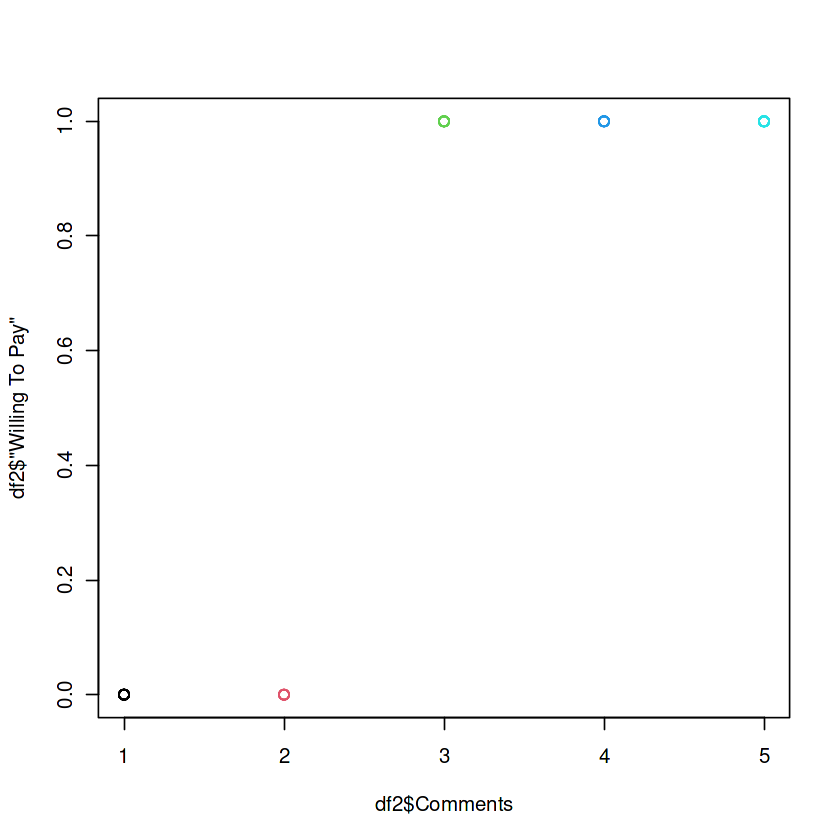

In [47]:
plot(x=df2$'Comments', y=df2$'Willing To Pay', col=df2$Comments)

In [41]:
df2 = df2 %>% apply(., 2, as.factor) %>% as.data.frame()
head(df2)

,Respondent,Sex,Civil Status,Location,Source of Income,Age,Willing To Pay,Age.cat,Comments
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,1,1,3,29,0,1,1
2,2,2,1,2,1,30,0,1,1
3,3,2,1,2,3,22,0,1,1
4,4,2,1,2,1,24,1,1,5
5,5,1,1,2,1,31,1,1,5
6,6,2,1,2,1,21,1,1,5


# Using Chi-square test in contingency table for each variables

In [105]:
for (x in colnames(df2)) {
  if (x != "Comments") {
    # Create the contingency table
    contingency_table <- table(df2[[x]], df2$'Comments')
    
    # Perform Fisher's exact test
    result <- chisq.test(contingency_table)
    
    # Print the results
    print("-----------------")
    print(contingency_table)
    print(x)
    print("-----------------")
    print(result)
  }
}

Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
     
      1 2 3 4 5
  1   1 0 0 0 0
  10  0 0 0 0 1
  100 1 0 0 0 0
  11  0 0 0 0 1
  12  0 0 1 0 0
  13  0 0 1 0 0
  14  0 0 1 0 0
  15  0 0 0 1 0
  16  0 1 0 0 0
  17  0 0 0 0 1
  18  0 0 1 0 0
  19  0 0 0 0 1
  2   1 0 0 0 0
  20  0 0 0 0 1
  21  0 0 0 0 1
  22  0 0 0 0 1
  23  0 0 0 0 1
  24  0 0 0 0 1
  25  0 0 0 0 1
  26  0 0 0 0 1
  27  0 0 0 0 1
  28  0 0 0 0 1
  29  1 0 0 0 0
  3   1 0 0 0 0
  30  0 0 1 0 0
  31  0 0 0 0 1
  32  0 1 0 0 0
  33  0 1 0 0 0
  34  0 0 1 0 0
  35  0 0 0 0 1
  36  0 1 0 0 0
  37  0 0 1 0 0
  38  0 0 0 0 1
  39  0 0 0 1 0
  4   0 0 0 0 1
  40  1 0 0 0 0
  41  0 0 0 1 0
  42  1 0 0 0 0
  43  1 0 0 0 0
  44  0 1 0 0 0
  45  0 1 0 0 0
  46  0 0 0 0 1
  47  1 0 0 0 0
  48  0 0 0 1 0
  49  1 0 0 0 0
  5   0 0 0 0 1
  50  1 0 0 0 0
  51  0 0 0 0 1
  52  0 0 0 0 1
  53  0 0 0 1 0
  54  0 0 0 1 0
  55  1 0 0 0 0
  56  0 0 0 0 1
  57  0 0 0 0 1
  58  0 0 1 0 0
  59  1 0 0 0 0
  6   0 0 0 0 1
  60  0 0 0 0 1
  61  0 0 0 0 1
  62  0 0 

Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
   
     1  2  3  4  5
  1  5  2  4  3 26
  2 13  6 13 10 18
[1] "Sex"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 12.025, df = 4, p-value = 0.01717



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
   
     1  2  3  4  5
  1 10  5 11  9 39
  2  8  3  6  4  5
[1] "Civil Status"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 9.5486, df = 4, p-value = 0.04876



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
   
     1  2  3  4  5
  1  3  0  6  6  8
  2 15  8 11  7 36
[1] "Location"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 8.7602, df = 4, p-value = 0.06738



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
   
     1  2  3  4  5
  1 11  5  7  3 24
  2  0  1  4  5  1
  3  7  2  6  5 19
[1] "Source of Income"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 20.067, df = 8, p-value = 0.01008



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
    
      1  2  3  4  5
  21  3  2  0  0  8
  22  2  0  1  0 10
  23  0  0  3  1  4
  24  1  0  0  0  2
  25  0  1  0  0  5
  26  1  0  1  1  1
  27  2  0  0  2  2
  28  0  1  1  0  0
  29  1  0  0  1  1
  30  1  1  0  0  3
  31  1  0  2  1  1
  32  0  0  0  0  1
  33  1  0  1  0  1
  34  1  0  1  0  1
  35  0  0  1  0  0
  37  0  1  0  0  1
  40  1  0  0  0  0
  41  1  0  1  0  0
  42  0  1  1  0  0
  43  0  0  1  0  0
  44  0  1  0  0  1
  45  0  0  0  0  1
  46  0  0  0  2  0
  48  0  0  1  1  0
  49  1  0  0  0  0
  50  1  0  0  0  0
  51  0  0  0  1  0
  53  0  0  1  0  1
  54  0  0  1  0  0
  55  0  0  0  1  0
  56  0  0  0  2  0
[1] "Age"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 147.36, df = 120, p-value = 0.04555



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
   
     1  2  3  4  5
  0 18  8  0  0  0
  1  0  0 17 13 44
[1] "Willing To Pay"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 100, df = 4, p-value < 2.2e-16



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "-----------------"
   
     1  2  3  4  5
  1 14  5 11  6 40
  2  4  3  6  7  4
[1] "Age.cat"
[1] "-----------------"

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 13.73, df = 4, p-value = 0.008208



### warning message becasue of small samples
# Comments vs Age.cat, Source of Income, Sex, and Civil Status are statistically significant (lowest-highest). From 0.008268 (Age.cat) to 0.04 (Civil Status)
# Comments vs Willing To Pay P-value is approx. 0 because it has a near if not perfect association.


In [49]:
install.packages("nnet")
library(nnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [54]:
model <- multinom(df2$'Comments' ~df2$'Age.cat')
summary(model)

# weights:  15 (8 variable)
initial  value 160.943791 
iter  10 value 137.008717
final  value 136.974331 
converged


Call:
multinom(formula = df2$Comments ~ df2$Age.cat)

Coefficients:
  (Intercept) df2$Age.cat2
2  -1.0295640    0.7417423
3  -0.2411245    0.6465185
4  -0.8472510    1.4067970
5   1.0498431   -1.0499380

Std. Errors:
  (Intercept) df2$Age.cat2
2   0.5209836    0.9245335
3   0.4029120    0.7609119
4   0.4879478    0.7943124
5   0.3105324    0.7722813

Residual Deviance: 273.9487 
AIC: 289.9487 

# Using Likelihood Ratio Test to a Multinomial Logistic Regression

In [106]:
# Multinomial fit
inds <- c('Civil Status', 'Source of Income', 'Sex', 'Age.cat','Location')

# Fit the full multinomial model
model_full <- nnet::multinom(df2$Comments ~ ., data = df2[, inds])

# Fit the reduced multinomial model
model_reduced <- nnet::multinom(df2$Comments ~ 1, data = df2)

# Perform likelihood ratio test
result <- lmtest::lrtest(model_full, model_reduced)

# Extract the p-value for the overall model
p_value <- result$`Pr(>Chisq)`[2]

# Print the p-value
print(p_value)



# weights:  40 (28 variable)
initial  value 160.943791 
iter  10 value 119.520336
iter  20 value 117.884491
iter  30 value 117.829128
final  value 117.828781 
converged
# weights:  10 (4 variable)
initial  value 160.943791 
final  value 143.841482 
converged
[1] 0.000776447




# Comparing two models using Likelihood Ratio Test. It indicate the evidence against the null hypothesis that the reduced model is just as good as the full model. 

# The MLR model has a p-value of 0.001 (statistically significant) which means that the model saw signficant imporvement in fit using the independent variables.

# Quantifying the contribution of each variable to fit:

In [108]:
# Multinomial fit
inds = c('Civil Status', 'Source of Income', 'Sex', 'Age.cat','Location')
for (x in inds){
    print(cat('\\n\\n\\n-------------'))
    print(x)
    model_full <- multinom(df2$Comments ~ ., data=df2 %>% select(., inds))
    
    model_reduced <- multinom(df2$Comments ~., data=df2 %>% select(., inds) %>% select(., -x))

    result <- lmtest::lrtest(model_full, model_reduced)
    p_val1 <- result$`Pr(>Chisq)`[[2]]
    print('--')
    print(p_val1)
}


\n\n\n-------------NULL
[1] "Civil Status"
# weights:  40 (28 variable)
initial  value 160.943791 
iter  10 value 119.520336
iter  20 value 117.884491
iter  30 value 117.829128
final  value 117.828781 
converged
# weights:  35 (24 variable)
initial  value 160.943791 
iter  10 value 122.705134
iter  20 value 121.039901
iter  30 value 120.986415
final  value 120.986188 
converged
[1] "--"
[1] 0.1768391
\n\n\n-------------NULL
[1] "Source of Income"
# weights:  40 (28 variable)
initial  value 160.943791 
iter  10 value 119.520336
iter  20 value 117.884491
iter  30 value 117.829128
final  value 117.828781 
converged
# weights:  30 (20 variable)
initial  value 160.943791 
iter  10 value 122.726454
iter  20 value 121.930848
iter  30 value 121.910106
final  value 121.910021 
converged
[1] "--"
[1] 0.4177618
\n\n\n-------------NULL
[1] "Sex"
# weights:  40 (28 variable)
initial  value 160.943791 
iter  10 value 119.520336
iter  20 value 117.884491
iter  30 value 117.829128
final  value 117.828

## Civil Status: 0.1768391
## Source of Income: 0.41
## Sex: 0.02
## Age.cat: 0.25
## Location: 0.07

# For the Multiple Logistic Regression Model, `Sex` is the statistically significant and has the highest contribution  (0.02)